EcoGlow_Data_Visualization_Verison_2

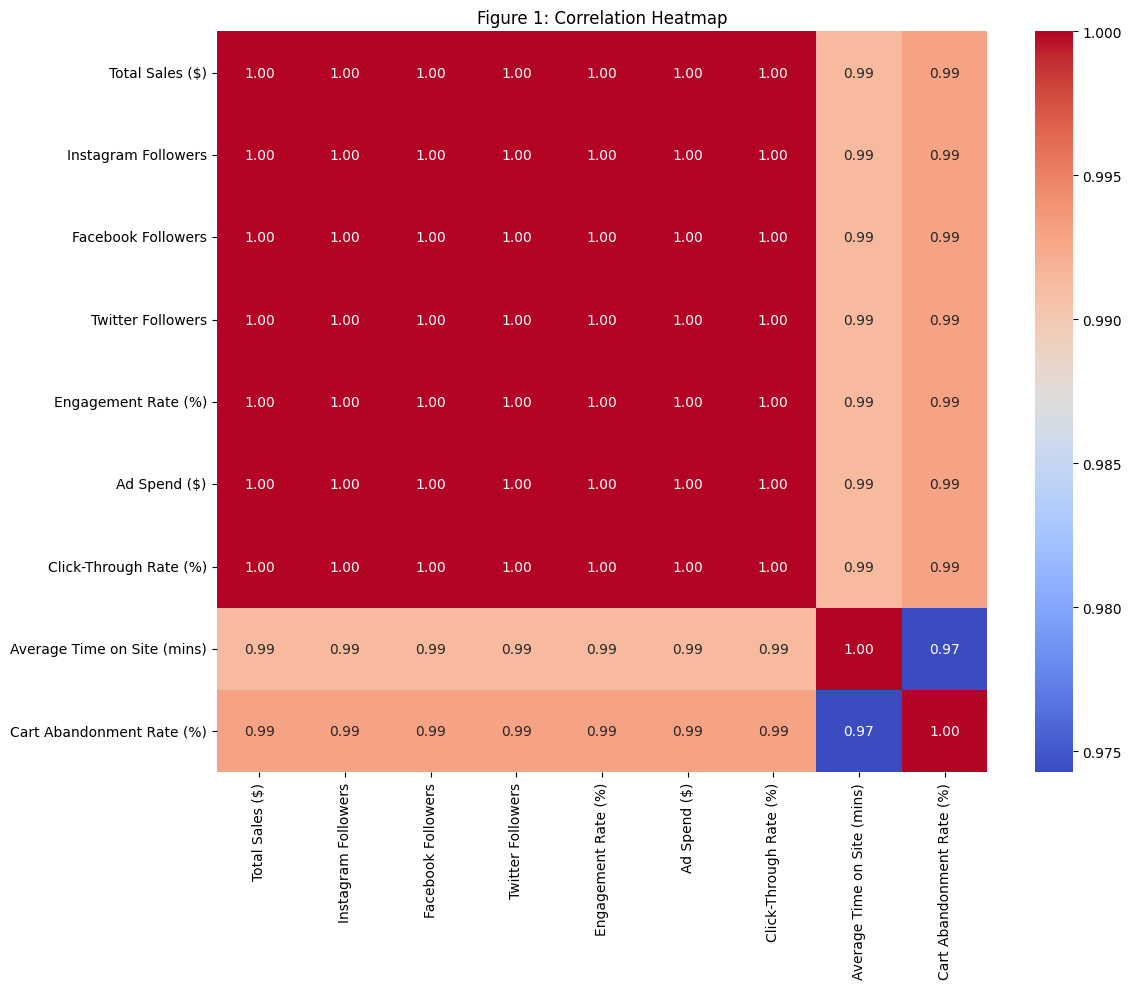

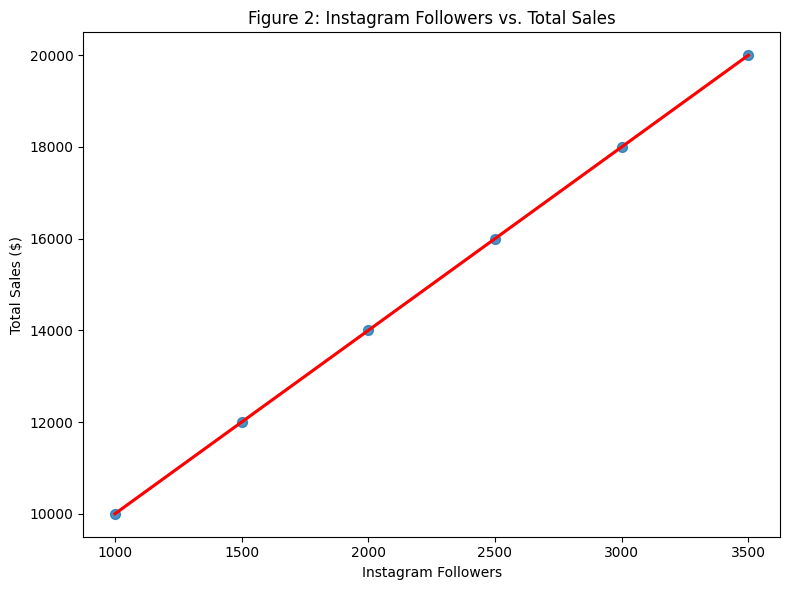

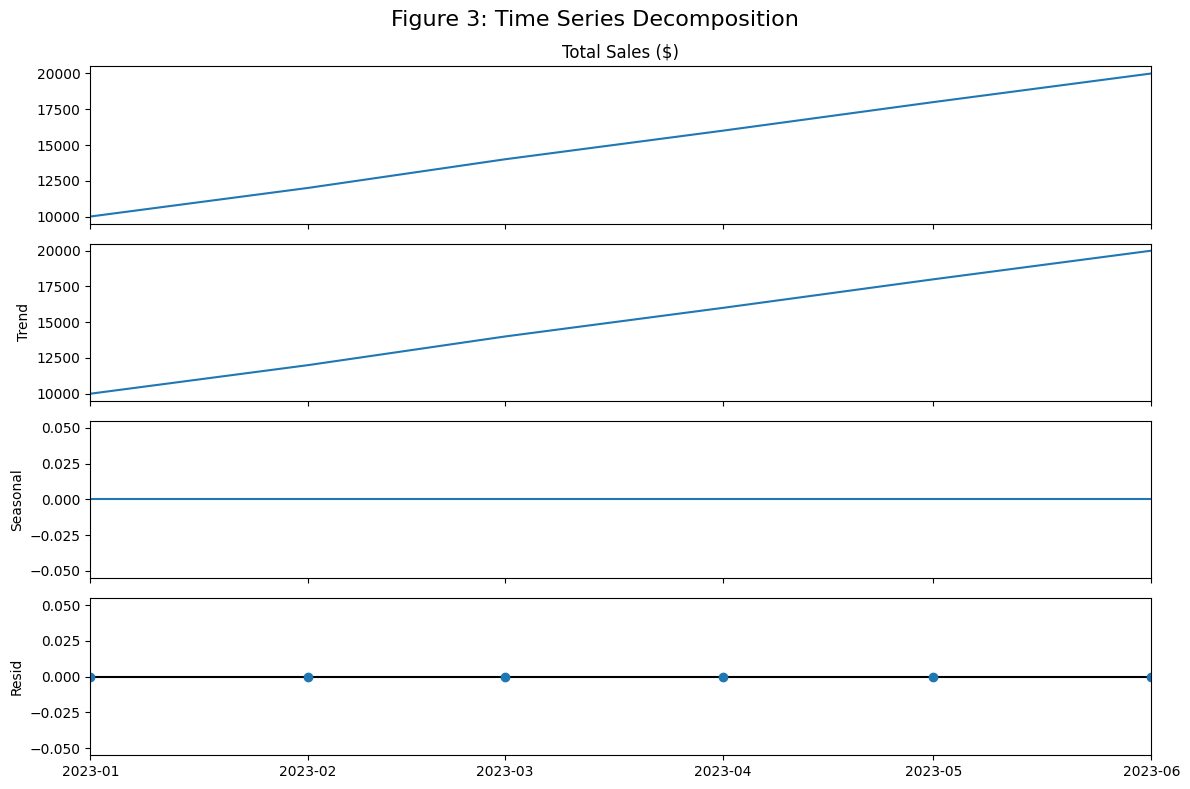

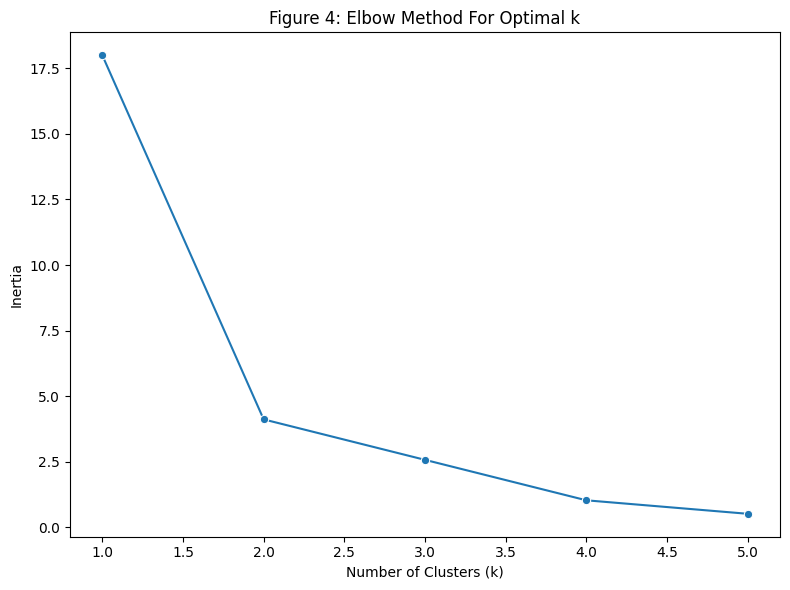

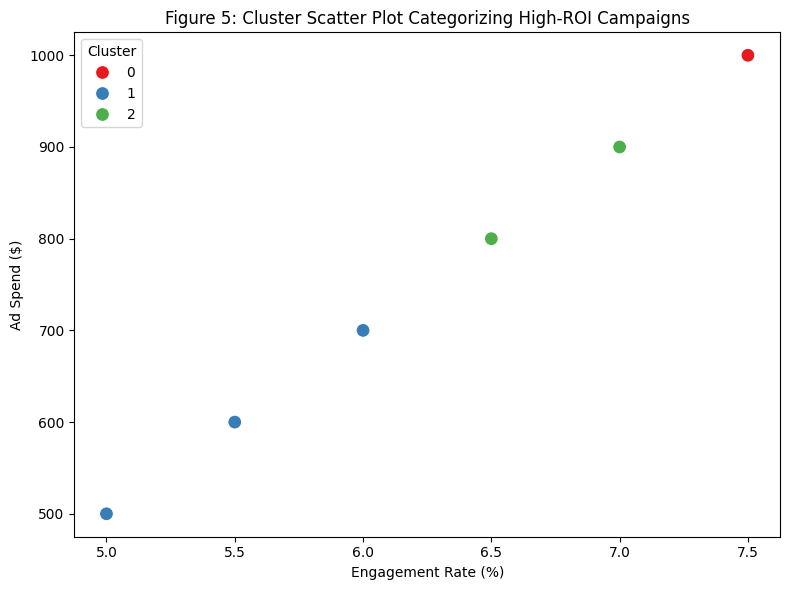

<ipython-input-1-26ab59d17847>:144: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Holiday Promotion', y='Total Sales ($)', data=promo_sales, palette=['#1f77b4', '#ff7f0e'])


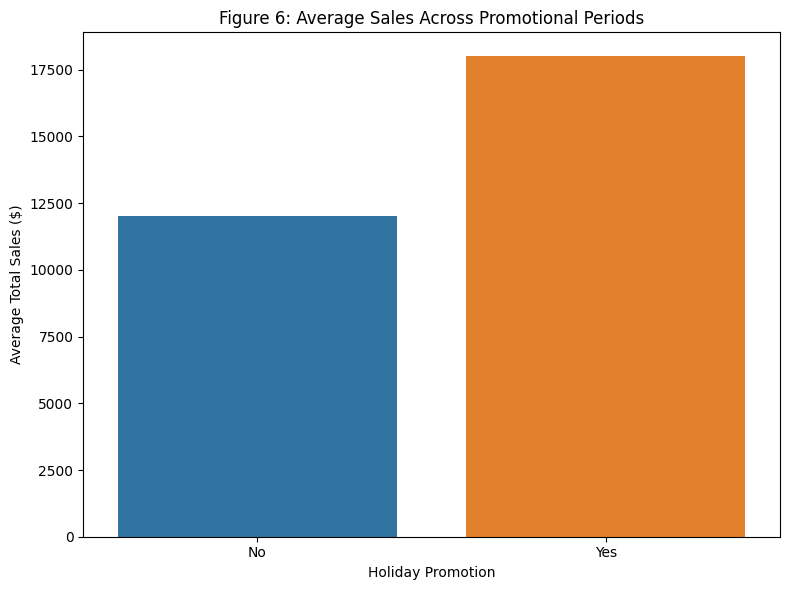

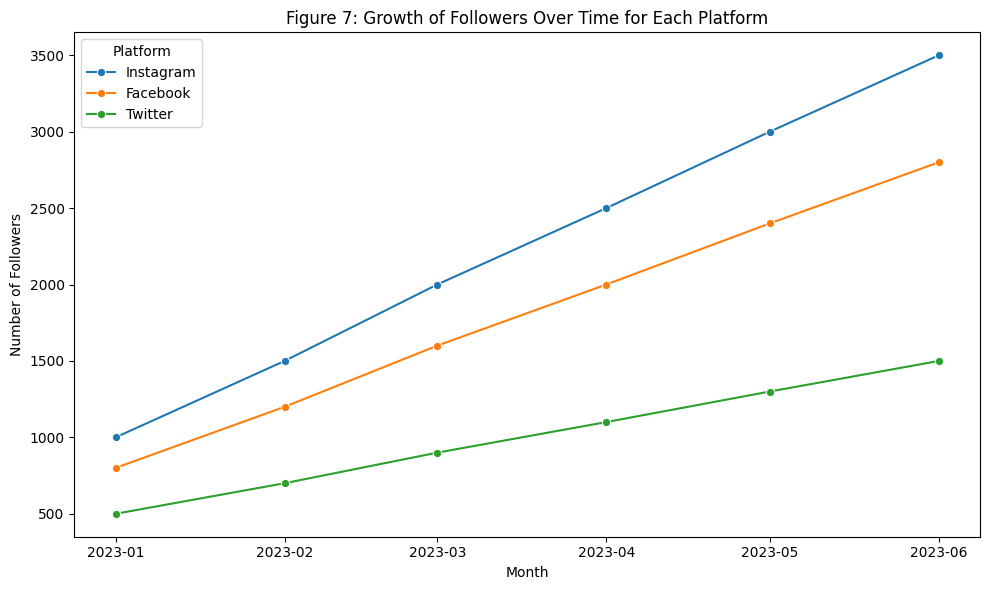

<ipython-input-1-26ab59d17847>:167: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Referral Source', y='Cart Abandonment Rate (%)', data=merged_data, palette='Set2')


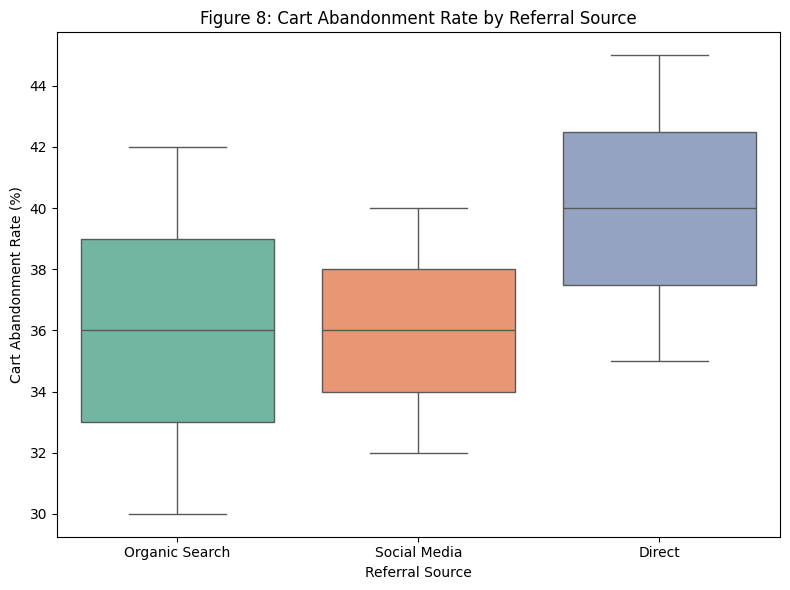

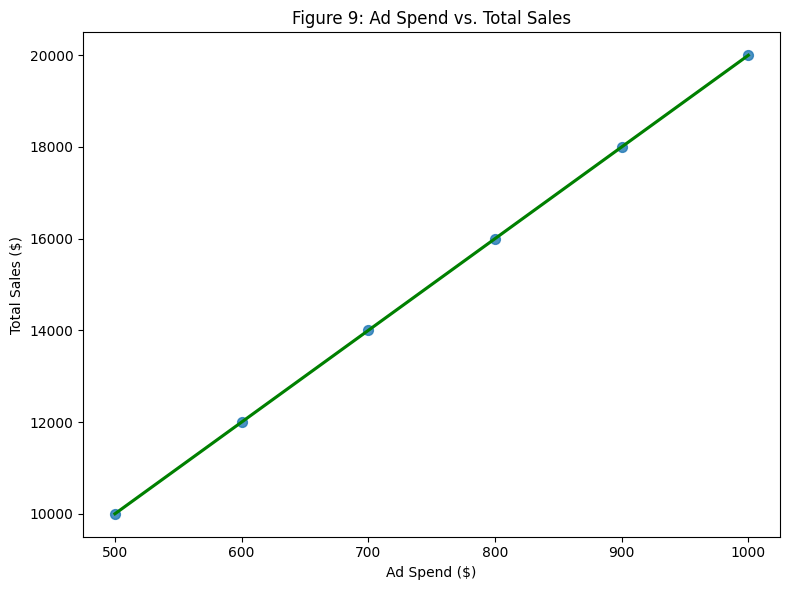

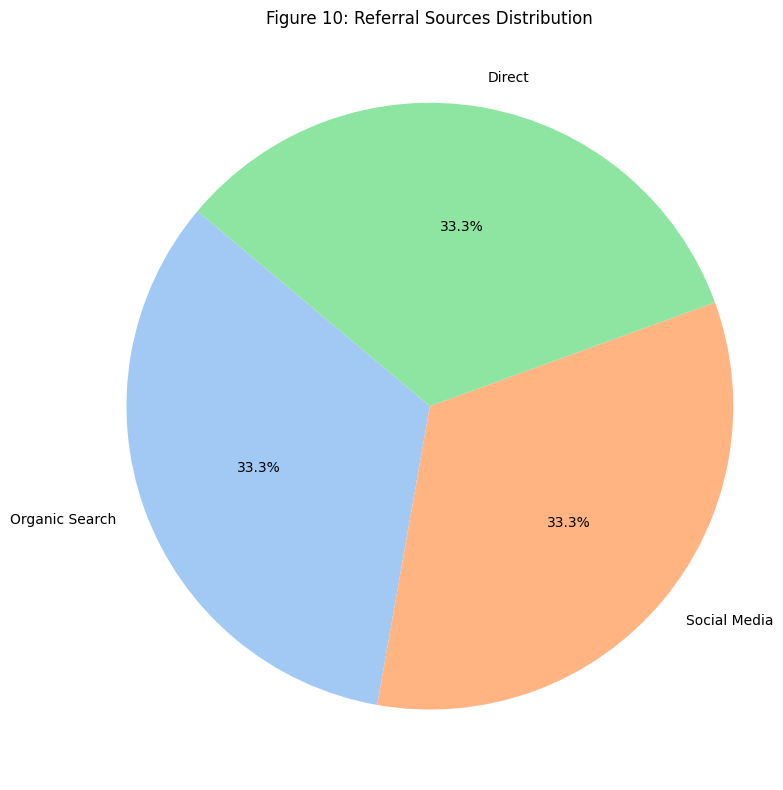

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

def load_data():
    try:
        social_media_data = {
            'Month': ['2023-01', '2023-02', '2023-03', '2023-04', '2023-05', '2023-06'],
            'Instagram Followers': [1000, 1500, 2000, 2500, 3000, 3500],
            'Facebook Followers': [800, 1200, 1600, 2000, 2400, 2800],
            'Twitter Followers': [500, 700, 900, 1100, 1300, 1500],
            'Engagement Rate (%)': [5.0, 5.5, 6.0, 6.5, 7.0, 7.5],
            'Ad Spend ($)': [500, 600, 700, 800, 900, 1000],
            'Click-Through Rate (%)': [2.0, 2.2, 2.4, 2.6, 2.8, 3.0]
        }
        social_media = pd.DataFrame(social_media_data)

        sales_data = {
            'Month': ['2023-01', '2023-02', '2023-03', '2023-04', '2023-05', '2023-06'],
            'Total Sales ($)': [10000, 12000, 14000, 16000, 18000, 20000],
            'Holiday Promotion': ['No', 'No', 'No', 'Yes', 'Yes', 'Yes'],
            'New Product Launch': [False, False, True, False, False, False]
        }
        sales = pd.DataFrame(sales_data)

        customer_behavior_data = {
            'Month': ['2023-01', '2023-02', '2023-03', '2023-04', '2023-05', '2023-06'],
            'Average Time on Site (mins)': [3.5, 3.7, 3.9, 4.0, 4.2, 4.5],
            'Cart Abandonment Rate (%)': [30, 32, 35, 40, 42, 45],
            'Referral Source': ['Organic Search', 'Social Media', 'Direct', 'Social Media', 'Organic Search', 'Direct']
        }
        customer_behavior = pd.DataFrame(customer_behavior_data)

        social_media['Month'] = pd.to_datetime(social_media['Month'])
        sales['Month'] = pd.to_datetime(sales['Month'])
        customer_behavior['Month'] = pd.to_datetime(customer_behavior['Month'])

        return social_media, sales, customer_behavior

    except Exception as e:
        print(f"Error loading data: {e}")
        return None, None, None

def preprocess_data(social_media, sales, customer_behavior):
    try:
        social_media = social_media.sort_values('Month').reset_index(drop=True)
        sales = sales.sort_values('Month').reset_index(drop=True)
        customer_behavior = customer_behavior.sort_values('Month').reset_index(drop=True)

        social_media['ID'] = social_media.index + 1
        sales['ID'] = sales.index + 1
        customer_behavior['ID'] = customer_behavior.index + 1

        merged_data = sales.merge(social_media, on='ID').merge(customer_behavior, on='ID')
        merged_data.drop('ID', axis=1, inplace=True)

        return merged_data

    except Exception as e:
        print(f"Error during data preprocessing: {e}")
        return None

def safe_plot(func):
    def wrapper(*args, **kwargs):
        try:
            func(*args, **kwargs)
        except Exception as e:
            print(f"Error in {func.__name__}: {e}")
    return wrapper

@safe_plot
def correlation_heatmap(merged_data):
    numeric_data = merged_data.select_dtypes(include=['number'])
    plt.figure(figsize=(12,10))
    sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Figure 1: Correlation Heatmap')
    plt.tight_layout()
    plt.show()

@safe_plot
def regression_instagram_sales(merged_data):
    plt.figure(figsize=(8,6))
    sns.regplot(x='Instagram Followers', y='Total Sales ($)', data=merged_data, scatter_kws={'s':50}, line_kws={'color':'red'})
    plt.title('Figure 2: Instagram Followers vs. Total Sales')
    plt.xlabel('Instagram Followers')
    plt.ylabel('Total Sales ($)')
    plt.tight_layout()
    plt.show()

@safe_plot
def time_series_decomposition(merged_data):
    sales_ts = merged_data.set_index('Month')['Total Sales ($)']
    if len(sales_ts) < 2:
        raise ValueError("Insufficient data points for seasonal decomposition.")
    decomposition = seasonal_decompose(sales_ts, model='additive', period=1)
    fig = decomposition.plot()
    fig.set_size_inches(12, 8)
    plt.suptitle('Figure 3: Time Series Decomposition', fontsize=16)
    plt.tight_layout()
    plt.show()

@safe_plot
def elbow_method_clustering(scaled_features, max_k):
    inertia = []
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(scaled_features)
        inertia.append(kmeans.inertia_)
    plt.figure(figsize=(8,6))
    sns.lineplot(x=list(range(1, max_k + 1)), y=inertia, marker='o')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia')
    plt.title('Figure 4: Elbow Method For Optimal k')
    plt.tight_layout()
    plt.show()

@safe_plot
def clustering_analysis(merged_data):
    features = merged_data[['Engagement Rate (%)', 'Ad Spend ($)', 'Click-Through Rate (%)']]
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)
    n_samples = len(features)
    max_k = min(5, n_samples)
    elbow_method_clustering(scaled_features, max_k)
    optimal_k = min(3, n_samples)
    kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
    merged_data['Cluster'] = kmeans.fit_predict(scaled_features)
    plt.figure(figsize=(8,6))
    sns.scatterplot(x='Engagement Rate (%)', y='Ad Spend ($)', hue='Cluster', data=merged_data, palette='Set1', s=100)
    plt.title('Figure 5: Cluster Scatter Plot Categorizing High-ROI Campaigns')
    plt.xlabel('Engagement Rate (%)')
    plt.ylabel('Ad Spend ($)')
    plt.legend(title='Cluster')
    plt.tight_layout()
    plt.show()

@safe_plot
def promotional_effectiveness(merged_data):
    promo_sales = merged_data.groupby('Holiday Promotion')['Total Sales ($)'].mean().reset_index()
    plt.figure(figsize=(8,6))
    sns.barplot(x='Holiday Promotion', y='Total Sales ($)', data=promo_sales, palette=['#1f77b4', '#ff7f0e'])
    plt.title('Figure 6: Average Sales Across Promotional Periods')
    plt.xlabel('Holiday Promotion')
    plt.ylabel('Average Total Sales ($)')
    plt.tight_layout()
    plt.show()

@safe_plot
def followers_growth_over_time(merged_data):
    plt.figure(figsize=(10,6))
    sns.lineplot(x='Month', y='Instagram Followers', data=merged_data, label='Instagram', marker='o')
    sns.lineplot(x='Month', y='Facebook Followers', data=merged_data, label='Facebook', marker='o')
    sns.lineplot(x='Month', y='Twitter Followers', data=merged_data, label='Twitter', marker='o')
    plt.title('Figure 7: Growth of Followers Over Time for Each Platform')
    plt.xlabel('Month')
    plt.ylabel('Number of Followers')
    plt.legend(title='Platform')
    plt.tight_layout()
    plt.show()

@safe_plot
def cart_abandonment_boxplot(merged_data):
    plt.figure(figsize=(8,6))
    sns.boxplot(x='Referral Source', y='Cart Abandonment Rate (%)', data=merged_data, palette='Set2')
    plt.title('Figure 8: Cart Abandonment Rate by Referral Source')
    plt.xlabel('Referral Source')
    plt.ylabel('Cart Abandonment Rate (%)')
    plt.tight_layout()
    plt.show()

@safe_plot
def adspend_vs_sales_scatter(merged_data):
    plt.figure(figsize=(8,6))
    sns.regplot(x='Ad Spend ($)', y='Total Sales ($)', data=merged_data, scatter_kws={'s':50}, line_kws={'color':'green'})
    plt.title('Figure 9: Ad Spend vs. Total Sales')
    plt.xlabel('Ad Spend ($)')
    plt.ylabel('Total Sales ($)')
    plt.tight_layout()
    plt.show()

@safe_plot
def referral_sources_pie_chart(merged_data):
    referral_counts = merged_data['Referral Source'].value_counts()
    plt.figure(figsize=(8,8))
    plt.pie(referral_counts, labels=referral_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
    plt.title('Figure 10: Referral Sources Distribution')
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

def main():
    social_media, sales, customer_behavior = load_data()
    if social_media is None or sales is None or customer_behavior is None:
        return

    merged_data = preprocess_data(social_media, sales, customer_behavior)
    if merged_data is None:
        return

    correlation_heatmap(merged_data)
    regression_instagram_sales(merged_data)
    time_series_decomposition(merged_data)
    clustering_analysis(merged_data)
    promotional_effectiveness(merged_data)
    followers_growth_over_time(merged_data)
    cart_abandonment_boxplot(merged_data)
    adspend_vs_sales_scatter(merged_data)
    referral_sources_pie_chart(merged_data)

if __name__ == "__main__":
    main()
